In [20]:
import pandas as pd
import seaborn as seaborn
import statistics
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import AnchoredText
import os
import math
import numpy

## Significant Pathways

In [21]:
Path_abund=pd.read_csv("Merged_Pathabundance_Table_CPM_meta.tsv",delimiter='\t')
Mapping_dict={}
for i in range(Path_abund.shape[0]):
    Mapping_dict['X'+str(i)]=Path_abund.iloc[i,0]
    Path_abund.iloc[i,0]='X'+str(i)
    
Path_abund.set_index(['Sample_ID'],inplace=True)
Path_abund.to_csv("Path_abundance_Temp.tsv")


In [22]:
Sig_Results=pd.read_csv("./Pathways_MaAslin/significant_results.tsv",delimiter="\t")
Filter_By_pval=(Sig_Results['pval']<0.05)&(Sig_Results['qval']<0.05)
Sig_Results= Sig_Results.loc[Filter_By_pval]

In [23]:
Sex_Correlated=list(Sig_Results[Sig_Results['metadata']=='Sex']['feature'])
Sig_Results=Sig_Results[~Sig_Results['feature'].isin(Sex_Correlated)]
Sig_Results["feature"]=Sig_Results["feature"].apply(lambda x:Mapping_dict[x])

In [24]:
Sig_Results.to_csv("Significant_Pathways_Stats.csv")

In [25]:
Path_abund.reset_index(inplace=True)

In [26]:
Path_abund["Sample_ID"]=Path_abund["Sample_ID"].apply(lambda x:Mapping_dict[x])

In [27]:
Path_Abund_Filtered=Path_abund[Path_abund["Sample_ID"].isin(Sig_Results["feature"])]
Path_Abund_Filtered=Path_Abund_Filtered.reset_index(drop=True)


In [28]:
Path_Abund_Filtered.to_csv("Sig_results_abundance_path.csv")

In [29]:
Path_Abund_Unstratified_Filtered=Path_Abund_Filtered[~Path_Abund_Filtered['Sample_ID'].str.contains('|',regex=False)]
Path_Abund_Unstratified_Filtered=Path_Abund_Unstratified_Filtered.reset_index(drop=True)
Sig_Results.set_index("feature",inplace=True)

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_14931/1243900890.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x14f3e9210>, <matplotlib.lines.Line2D object at 0x14f3e9240>, <matplotlib.lines.Line2D object at 0x14f3e9000>, <matplotlib.lines.Line2D object at 0x14f3e8ee0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_14931/1243900890.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x14f3eb460>, <matplotlib.lines.Line2D object at 0x14f3e83d0>, <matplotlib.lines.Line2D object at 0x14f3eb6d0>, <matplotlib.lines.Line2D object at 0x14f3eb760>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_14931/1243900890.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x14f587ac0>, <matplotlib.lines.Line2D object at 0x14f587df0>, <matplotlib.lines.Line2D object at 0x14f5872e0>, <matplotlib.lines.Line2D object at 0x14f5873a0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_14931/1243900890.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x14f5b73a0>, <matplotlib.lines.Line2D object at 0x14f5b7e50>, <matplotlib.lines.Line2D object at 0x14f3a01f0>, <matplotlib.lines.Line2D object at 0x14f3a0880>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

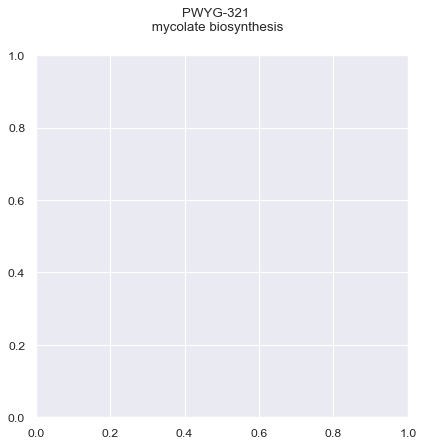

In [30]:
plt.figure(figsize=(6, 6), dpi=80)
if not os.path.exists('Sig_Plots_Pathways_Unstratified/'):
    os.mkdir('Sig_Plots_Pathways_Unstratified/')
for i in range(Path_Abund_Unstratified_Filtered.shape[0]):
    x=[1,1,1,3,3,5,5,5,7,7,7]
    x1=list(np.linspace(0.5,1.5,100))
    x2=list(np.linspace(2.5,3.5,100))
    x3=list(np.linspace(4.5,5.5,100))
    x4=list(np.linspace(6.5,7.5,100))
    x5=[1,3,3,5,7]
    y=list(Path_Abund_Unstratified_Filtered.iloc[i,[1,2,3,4,5,11,12,13,14,15,16]])
    y1=[statistics.median(y[0:3])]*len(x1)
    y2=[statistics.median(y[3:5])]*len(x1)
    y3=[statistics.median(y[5:8])]*len(x1)
    y4=[statistics.median(y[8:11])]*len(x1)
    y5=Path_Abund_Unstratified_Filtered.iloc[i,[6,7,8,9,10]]
    ax1=plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='k',linewidth=1,linestyle="--",label="Median")
    ax2=plt.scatter(x,y,s=25,cmap='summer',label="Individual")
    ax3=plt.scatter(x5,y5,s=30,cmap='r',marker=',',label="Pooled")
    plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
    plt.suptitle("\n".join(Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"].split(":")),fontsize=12)
    plt.xticks([1,3,5,7],['Control','DSS','RCE','RCE+DSS'])
    top_DSS=plt.ylim()[1]-0.02*plt.ylim()[1]
    if len(Sig_Results.loc[Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"]].shape)==1:     
        plt.text(0.3,top_DSS,Sig_Results.loc[Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"metadata"]+": " + str(Sig_Results.loc[Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"value"])+"\n\nCoeff: "+ str(Sig_Results.loc[Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"coef"])[0:5]+"\n\nP_value: "+str(format(Sig_Results.loc[Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"pval"],'f'))+"\n\nQ_value: "+str(format(Sig_Results.loc[Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"qval"],'f')),fontsize=10,verticalalignment="top")
    else:
        plt.text(0.3,top_DSS,Sig_Results.loc[Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"metadata"].iloc[0]+": " + str(Sig_Results.loc[Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"value"].iloc[0])+"\n\nCoeff: "+ str(Sig_Results.loc[Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"coef"].iloc[0])[0:5]+"\n\nP_value: "+str(format(Sig_Results.loc[Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"pval"].iloc[0],'f'))+"\n\nQ_value: "+str(format(Sig_Results.loc[Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"qval"].iloc[0],'f')),fontsize=10,verticalalignment="top")
    plt.xlabel("Treatment Group")
    plt.ylabel("Path Abundances")
    plt.savefig("Sig_Plots_Pathways_Unstratified/"+Path_Abund_Unstratified_Filtered.loc[i,"Sample_ID"][0:15].replace(': ','')+'.png',dpi=300)
    plt.cla()
    

In [32]:
Path_Abund_Unstratified_Filtered.set_index("Sample_ID",inplace=True)

Control_327  Control_328  \
Sample_ID                                                                      
ARGININE-SYN4-PWY: L-ornithine de novo  biosynt...     5.286520     10.97320   
BIOTIN-BIOSYNTHESIS-PWY: biotin biosynthesis I         1.752580      0.00000   
FASYN-ELONG-PWY: fatty acid elongation -- satur...     1.518180      0.00000   
FASYN-INITIAL-PWY: superpathway of fatty acid b...     0.952460      0.00000   
HISDEG-PWY: L-histidine degradation I                 63.967400     70.19690   
P164-PWY: purine nucleobases degradation I (ana...    13.517000      6.08764   
P185-PWY: formaldehyde assimilation III (dihydr...     1.028830      1.19278   
PWY-5030: L-histidine degradation III                 13.643000     23.18480   
PWY-5088: L-glutamate degradation VIII (to prop...     0.000000      0.00000   
PWY-5154: L-arginine biosynthesis III (via N-ac...    19.562000     37.10690   
PWY-5910: superpathway of geranylgeranyldiphosp...     3.953490      2.33953   
PWY-5941: glycogen degradation II (eukaryotic)         2.894350      6.92059   
PWY-5989: stearate biosynthesis II (bacteria an...     1.122830      0.00000   
PWY-6282: palmitoleate biosynthesis I (from (5Z...     1.141190      0.00000   
PWY-6519: 8-amino-7-oxononanoate biosynthesis I        1.382410      0.00000   
PWY-7388: octanoyl-[acyl-carrier protein] biosy...     0.888902      0.00000   
PWY-7664: oleate biosynthesis IV (anaerobic)           1.330200      0.00000   
PWY-922: mevalonate pathway I                          2.829260      1.65092   
PWY0-1415: superpathway of heme biosynthesis fr...     0.000000      0.00000   
PWY0-862: (5Z)-dodec-5-enoate biosynthesis             1.141710      0.00000   
PWYG-321: mycolate biosynthesis                        1.380620      0.00000   

                                                    Control_330    DSS_334  \
Sample_ID                                                                    
ARGININE-SYN4-PWY: L-ornithine de novo  biosynt...     6.511700   54.00770   
BIOTIN-BIOSYNTHESIS-PWY: biotin biosynthesis I         1.388350   32.76380   
FASYN-ELONG-PWY: fatty acid elongation -- satur...     0.994170   31.91120   
FASYN-INITIAL-PWY: superpathway of fatty acid b...     0.623265   20.76800   
HISDEG-PWY: L-histidine degradation I                 35.692400  201.68300   
P164-PWY: purine nucleobases degradation I (ana...     6.990740   33.44550   
P185-PWY: formaldehyde assimilation III (dihydr...     1.048810   10.54630   
PWY-5030: L-histidine degradation III                 13.505800   90.47420   
PWY-5088: L-glutamate degradation VIII (to prop...     0.000000    0.00000   
PWY-5154: L-arginine biosynthesis III (via N-ac...    20.983400   85.06420   
PWY-5910: superpathway of geranylgeranyldiphosp...     1.497640    0.00000   
PWY-5941: glycogen degradation II (eukaryotic)         4.273660   22.08360   
PWY-5989: stearate biosynthesis II (bacteria an...     0.735312   23.76470   
PWY-6282: palmitoleate biosynthesis I (from (5Z...     0.747033   24.60260   
PWY-6519: 8-amino-7-oxononanoate biosynthesis I        1.094920   26.95680   
PWY-7388: octanoyl-[acyl-carrier protein] biosy...     0.581735   21.18830   
PWY-7664: oleate biosynthesis IV (anaerobic)           0.870826   28.36170   
PWY-922: mevalonate pathway I                          1.056040    0.00000   
PWY0-1415: superpathway of heme biosynthesis fr...     0.000000    2.30356   
PWY0-862: (5Z)-dodec-5-enoate biosynthesis             0.747218   24.69860   
PWYG-321: mycolate biosynthesis                        0.903944   29.15440   

                                                      DSS_339  DSS_treatedp  \
Sample_ID                                                                     
ARGININE-SYN4-PWY: L-ornithine de novo  biosynt...   62.69930      42.61020   
BIOTIN-BIOSYNTHESIS-PWY: biotin biosynthesis I       73.61380      13.83780   
FASYN-ELONG-PWY: fatty acid elongation -- satur...   82.40080      12.86770   
FASYN-INITIAL-PWY: su

In [62]:
Samples

['Control_327',
 'Control_328',
 'Control_330',
 'DSS_334',
 'DSS_339',
 'DSS_treatedp',
 'D_Control',
 'D_DSS',
 'D_RCE',
 'D_RCE_plus_DSS',
 'RCE_318',
 'RCE_319',
 'RCE_322',
 'RCE_plus_DSS_301',
 'RCE_plus_DSS_305',
 'RCE_plus_DSS_313',
 'Start']

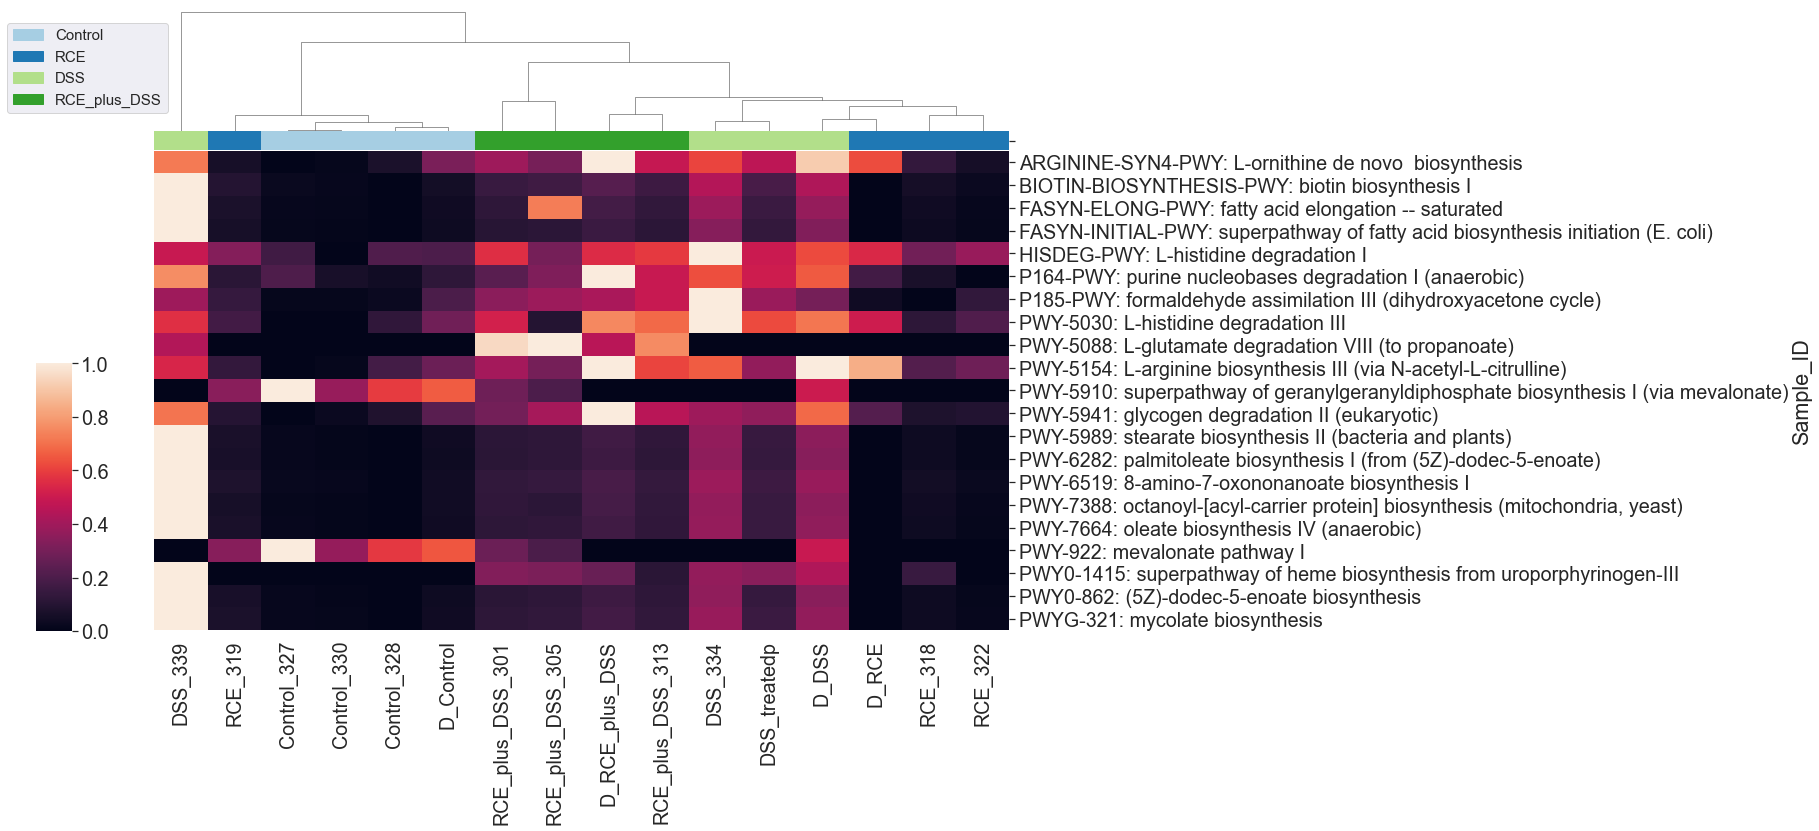

In [97]:
import seaborn
import matplotlib.patches as mpatches

Samples=list(Path_Abund_Unstratified_Filtered.columns)
palette = seaborn.color_palette("Paired")

Group_Names=["Control","RCE","DSS","RCE_plus_DSS"]
Group_List=[]
for i in Samples:
    for j in Group_Names:
        if j in i and 'plus' not in i:
            Group_List.append(j)
            break
        elif "plus" in i:
            Group_List.append("RCE_plus_DSS")
            break

Color_dict={}
for i in range(len(Group_List)):
    Color_dict[Samples[i]]=palette[Group_Names.index(Group_List[i])]
Col_ser=pd.Series(Color_dict)
seaborn.set(font_scale=1.8)
ax=seaborn.clustermap(Path_Abund_Unstratified_Filtered.drop(columns=["Start"]),standard_scale=0,figsize=(25,12),row_cluster=False, metric="correlation",dendrogram_ratio=(.1, .2),cbar_pos=(0, .25, .02, .31),col_colors=Col_ser)

Patches=[]
for t in Group_Names:
    Patches.append(mpatches.Patch(color=palette[Group_Names.index(t)], label=t))

plt.legend(handles=Patches,loc='upper left',bbox_to_anchor=(-1, 1.8, 0.2, 0.5),fontsize='x-small')
ax.savefig("Sig_Plots_Pathways_Unstratified/Sig_Plots_Pathways_Unstratified.jpg")

In [31]:
Path_Abund_Unstratified_Filtered

Sample_ID  Control_327  \
0   ARGININE-SYN4-PWY: L-ornithine de novo  biosyn...     5.286520   
1      BIOTIN-BIOSYNTHESIS-PWY: biotin biosynthesis I     1.752580   
2   FASYN-ELONG-PWY: fatty acid elongation -- satu...     1.518180   
3   FASYN-INITIAL-PWY: superpathway of fatty acid ...     0.952460   
4               HISDEG-PWY: L-histidine degradation I    63.967400   
5   P164-PWY: purine nucleobases degradation I (an...    13.517000   
6   P185-PWY: formaldehyde assimilation III (dihyd...     1.028830   
7               PWY-5030: L-histidine degradation III    13.643000   
8   PWY-5088: L-glutamate degradation VIII (to pro...     0.000000   
9   PWY-5154: L-arginine biosynthesis III (via N-a...    19.562000   
10  PWY-5910: superpathway of geranylgeranyldiphos...     3.953490   
11     PWY-5941: glycogen degradation II (eukaryotic)     2.894350   
12  PWY-5989: stearate biosynthesis II (bacteria a...     1.122830   
13  PWY-6282: palmitoleate biosynthesis I (from (5...     1.141190   
14    PWY-6519: 8-amino-7-oxononanoate biosynthesis I     1.382410   
15  PWY-7388: octanoyl-[acyl-carrier protein] bios...     0.888902   
16       PWY-7664: oleate biosynthesis IV (anaerobic)     1.330200   
17                      PWY-922: mevalonate pathway I     2.829260   
18  PWY0-1415: superpathway of heme biosynthesis f...     0.000000   
19         PWY0-862: (5Z)-dodec-5-enoate biosynthesis     1.141710   
20                    PWYG-321: mycolate biosynthesis     1.380620   

    Control_328  Control_330    DSS_334    DSS_339  DSS_treatedp  D_Control  \
0      10.97320     6.511700   54.00770   62.69930      42.61020   30.05740   
1       0.00000     1.388350   32.76380   73.61380      13.83780    3.95576   
2       0.00000     0.994170   31.91120   82.40080      12.86770    3.44942   
3       0.00000     0.623265   20.76800   61.28580       8.24588    2.16680   
4      70.19690    35.692400  201.68300  117.25500     118.20100   69.03470   
5       6.08764     6.990740   33.44550   39.82160      27.73300    9.76980   
6       1.19278     1.048810   10.54630    4.67502       4.61524    2.79123   
7      23.18480    13.505800   90.47420   56.91380      61.31560   35.51150   
8       0.00000     0.000000    0.00000    1.02351       0.00000    0.00000   
9      37.10690    20.983400   85.06420   73.01840      55.77630   46.86320   
10      2.33953     1.497640    0.00000    0.00000       0.00000    2.59815   
11      6.92059     4.273660   22.08360   37.42860      20.55830   14.18720   
12      0.00000     0.735312   23.76470   65.15650       9.63430    2.57345   
13      0.00000     0.747033   24.60260   69.07540       9.83472    2.59686   
14      0.00000     1.094920   26.95680   69.50920      11.32240    3.13053   
15      0.00000     0.581735   21.18830   57.64560       8.68312    2.61626   
16      0.00000     0.870826   28.36170   75.80560      11.37240    3.02430   
17      1.65092     1.056040    0.00000    0.00000       0.00000    1.83381   
18      0.00000     0.000000    2.30356    6.26828       2.16373    0.00000   
19      0.00000     0.747218   24.69860   68.49580       9.84680    2.59747   
20      0.00000     0.903944   29.15440   76.80320      11.73840    3.13723   

        D_DSS      D_RCE  D_RCE_plus_DSS    RCE_318    RCE_319    RCE_322  \
0    78.34830   55.12550        84.95820  16.133500  10.125100   9.889060   
1    31.68140    0.00000        16.41840   4.238370   7.009460   2.061850   
2    30.66900    0.00000        14.74100   3.270460   5.977260   1.321570   
3    20.09620    0.00000         9.38775   2.054900   3.761170   0.828349   
4   139.43600  126.28600       127.24900  84.269800  90.946600  98.833400   
5    34.58140   12.04370        50.82120   7.215460   9.188290   3.934650   
6     3.77680    1.27958         4.97028   0.901688   2.278340   2.161120   
7    68.31090   52.36420        71.28660  22.675600  26.909700  29.600000   
8     0.00000    0.00000         1.05933   0.000000   0.000000   0.0000

In [88]:
Path_Abund_Unstratified_Filtered.reset_index(inplace=True)

In [89]:
Heatmap_Dict={"Pathway":[],"DSS_only":[],"RCE_only":[],"RCEwDSS_only":[]}
DF=pd.DataFrame(Heatmap_Dict)
Counter=0
for i in Path_Abund_Unstratified_Filtered["Sample_ID"]:
    DF.loc[Counter]=[i,0,0,0]
    Temp=Sig_Results.loc[i,['metadata','coef','qval']]
    if len(Temp.shape)==1:
        DF.loc[Counter,Temp['metadata']]=-numpy.log(Temp['qval'])*numpy.sign(Temp['coef'])
    else:
        for k in range(Temp.shape[0]):
            DF.loc[Counter,Temp['metadata'][k]]=-numpy.log(Temp['qval'][k])*numpy.sign(Temp['coef'][k])
    Counter+=1
        
    
    

In [90]:
DF.set_index('Pathway',inplace=True)

In [91]:
T=seaborn.color_palette("coolwarm", as_cmap=True)


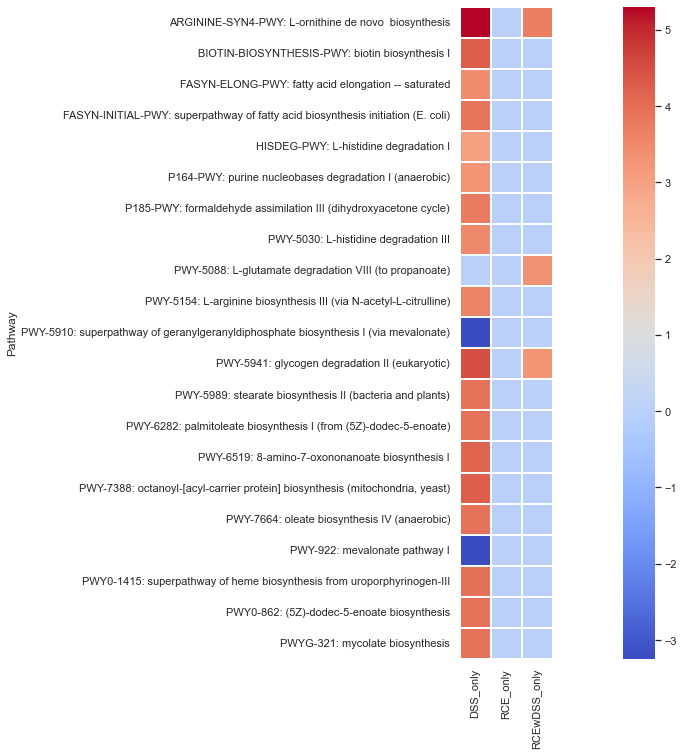

In [92]:
seaborn.set(rc = {'figure.figsize':(25,12)})

ax=seaborn.heatmap(DF,cmap=T,linewidths=0.1, linecolor='white',square=True)
ax=ax.get_figure()    


ax.savefig('Sig_Plots_Pathways_Unstratified/Correlated_Pathways_Unstratified.jpg')

    


In [93]:
Samples=list(Path_Abund_Unstratified_Filtered.columns)
Group_Names=["Control","RCE","DSS","RCE_plus_DSS","Start"]
Group_List=[]
for i in Samples:
    for j in Group_Names:
        if j in i and 'plus' not in i:
            Group_List.append(j)
            break
        elif "plus" in i:
            Group_List.append("RCE_plus_DSS")
            break

Group_List

['Control',
 'Control',
 'Control',
 'DSS',
 'DSS',
 'DSS',
 'Control',
 'DSS',
 'RCE',
 'RCE_plus_DSS',
 'RCE',
 'RCE',
 'RCE',
 'RCE_plus_DSS',
 'RCE_plus_DSS',
 'RCE_plus_DSS',
 'Start']

In [94]:
Path_Abund_Stratified_Filtered=Path_Abund_Filtered[Path_Abund_Filtered['Sample_ID'].str.contains('|',regex=False)]
Path_Abund_Stratified_Filtered=Path_Abund_Stratified_Filtered.reset_index(drop=True)


/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x28a4df460>, <matplotlib.lines.Line2D object at 0x28a4dd0f0>, <matplotlib.lines.Line2D object at 0x28a4cd720>, <matplotlib.lines.Line2D object at 0x28a4cc910>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x28a4dd7b0>, <matplotlib.lines.Line2D object at 0x28a4dd330>, <matplotlib.lines.Line2D object at 0x28ab51060>, <matplotlib.lines.Line2D object at 0x28ab51210>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x155ada950>, <matplotlib.lines.Line2D object at 0x155ad8d00>, <matplotlib.lines.Line2D object at 0x28a8f0d90>, <matplotlib.lines.Line2D object at 0x28a8f1150>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x15575f100>, <matplotlib.lines.Line2D object at 0x28979b670>, <matplotlib.lines.Line2D object at 0x289f31f30>, <matplotlib.lines.Line2D object at 0x155ad9f00>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x155a502e0>, <matplotlib.lines.Line2D object at 0x155b984f0>, <matplotlib.lines.Line2D object at 0x28a8f2890>, <matplotlib.lines.Line2D object at 0x28a8f22f0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x1547baa70>, <matplotlib.lines.Line2D object at 0x28a41c4c0>, <matplotlib.lines.Line2D object at 0x28abf0520>, <matplotlib.lines.Line2D object at 0x289bc4cd0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x155172590>, <matplotlib.lines.Line2D object at 0x155b12770>, <matplotlib.lines.Line2D object at 0x28a8f2380>, <matplotlib.lines.Line2D object at 0x28a19e110>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x289e496c0>, <matplotlib.lines.Line2D object at 0x289b79090>, <matplotlib.lines.Line2D object at 0x28a205de0>, <matplotlib.lines.Line2D object at 0x28a2069b0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x28a4459f0>, <matplotlib.lines.Line2D object at 0x28a12fbe0>, <matplotlib.lines.Line2D object at 0x289cf1270>, <matplotlib.lines.Line2D object at 0x177eb7370>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x155b9b4c0>, <matplotlib.lines.Line2D object at 0x28a4d3a90>, <matplotlib.lines.Line2D object at 0x289be2bf0>, <matplotlib.lines.Line2D object at 0x289be0910>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x28a12d7e0>, <matplotlib.lines.Line2D object at 0x28a41d8a0>, <matplotlib.lines.Line2D object at 0x28ac59fc0>, <matplotlib.lines.Line2D object at 0x28ac59f60>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x2899b1210>, <matplotlib.lines.Line2D object at 0x2899b0580>, <matplotlib.lines.Line2D object at 0x289edc100>, <matplotlib.lines.Line2D object at 0x289edc250>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x28a8abdc0>, <matplotlib.lines.Line2D object at 0x28a8a9a80>, <matplotlib.lines.Line2D object at 0x28a487ac0>, <matplotlib.lines.Line2D object at 0x28a12d030>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x28a80fbb0>, <matplotlib.lines.Line2D object at 0x28a80e5c0>, <matplotlib.lines.Line2D object at 0x2898cf1c0>, <matplotlib.lines.Line2D object at 0x2898cd030>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x28a431cf0>, <matplotlib.lines.Line2D object at 0x28a432e00>, <matplotlib.lines.Line2D object at 0x28a4310f0>, <matplotlib.lines.Line2D object at 0x28a432380>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x1559e7910>, <matplotlib.lines.Line2D object at 0x28ac5aad0>, <matplotlib.lines.Line2D object at 0x289d62bc0>, <matplotlib.lines.Line2D object at 0x289d631f0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x289d63910>, <matplotlib.lines.Line2D object at 0x1558a6e90>, <matplotlib.lines.Line2D object at 0x28ac58f10>, <matplotlib.lines.Line2D object at 0x28a4d2b90>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x1557ba740>, <matplotlib.lines.Line2D object at 0x1557bab60>, <matplotlib.lines.Line2D object at 0x1559e4af0>, <matplotlib.lines.Line2D object at 0x1558a66e0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x289e2b5b0>, <matplotlib.lines.Line2D object at 0x157d69090>, <matplotlib.lines.Line2D object at 0x289edd5a0>, <matplotlib.lines.Line2D object at 0x289729d50>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x155885de0>, <matplotlib.lines.Line2D object at 0x28a4a5ba0>, <matplotlib.lines.Line2D object at 0x155886620>, <matplotlib.lines.Line2D object at 0x155885db0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x155887790>, <matplotlib.lines.Line2D object at 0x1558867d0>, <matplotlib.lines.Line2D object at 0x28aaf4670>, <matplotlib.lines.Line2D object at 0x28aaf48b0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x28a4dc700>, <matplotlib.lines.Line2D object at 0x28a4dfd60>, <matplotlib.lines.Line2D object at 0x28a4dd390>, <matplotlib.lines.Line2D object at 0x28a4dc460>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x1550669e0>, <matplotlib.lines.Line2D object at 0x155066500>, <matplotlib.lines.Line2D object at 0x28ab50850>, <matplotlib.lines.Line2D object at 0x28ab537c0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x28a6dcd00>, <matplotlib.lines.Line2D object at 0x28a6df5e0>, <matplotlib.lines.Line2D object at 0x28a6ddf90>, <matplotlib.lines.Line2D object at 0x135907940>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x28a9a47c0>, <matplotlib.lines.Line2D object at 0x28a9a7a00>, <matplotlib.lines.Line2D object at 0x28a4a74c0>, <matplotlib.lines.Line2D object at 0x28a4a59c0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_87243/1428896749.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x289e29990>, <matplotlib.lines.Line2D object at 0x289909d50>, <matplotlib.lines.Line2D object at 0x289e29d20>, <matplotlib.lines.Line2D object at 0x289e2b280>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists

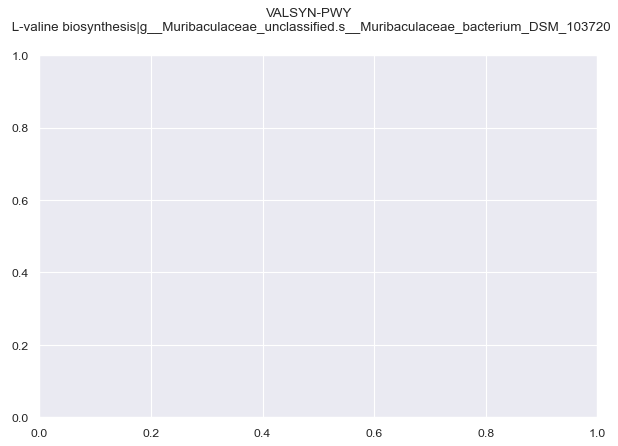

In [96]:
plt.figure(figsize=(9, 6), dpi=80)
if not os.path.exists('Sig_Plots_Pathways_Stratified/'):
    os.mkdir('Sig_Plots_Pathways_Stratified/')
for i in range(Path_Abund_Stratified_Filtered.shape[0]):
    x=[1,1,1,3,3,5,5,5,7,7,7]
    x1=list(np.linspace(0.5,1.5,100))
    x2=list(np.linspace(2.5,3.5,100))
    x3=list(np.linspace(4.5,5.5,100))
    x4=list(np.linspace(6.5,7.5,100))
    x5=[1,3,3,5,7]
    y=list(Path_Abund_Stratified_Filtered.iloc[i,[1,2,3,4,5,11,12,13,14,15,16]])
    y1=[statistics.median(y[0:3])]*len(x1)
    y2=[statistics.median(y[3:5])]*len(x1)
    y3=[statistics.median(y[5:8])]*len(x1)
    y4=[statistics.median(y[8:11])]*len(x1)
    y5=Path_Abund_Stratified_Filtered.iloc[i,[6,7,8,9,10]]
    ax1=plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='k',linewidth=1,linestyle="--",label="Median")
    ax2=plt.scatter(x,y,s=25,cmap='summer',label="Individual")
    ax3=plt.scatter(x5,y5,s=30,cmap='r',marker=',',label="Pooled")
    plt.legend([ax1,ax2,ax3],["Median","Individual","Pooled"],loc='upper right')
    plt.suptitle(Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"],fontsize=7)
    plt.suptitle("\n".join(Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"].split(":")),fontsize=12)
    plt.xticks([1,3,5,7],['Control','DSS','RCE','RCE+DSS'])
    top_DSS=plt.ylim()[1]-0.02*plt.ylim()[1]

    if len(Sig_Results.loc[Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"]].shape)==1:     
        plt.text(0.3,top_DSS,Sig_Results.loc[Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"metadata"]+": " + str(Sig_Results.loc[Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"value"])+"\n\nCoeff: "+ str(Sig_Results.loc[Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"coef"])[0:5]+"\n\nP_value: "+str(format(Sig_Results.loc[Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"pval"],'f'))+"\n\nQ_value: "+str(format(Sig_Results.loc[Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"qval"],'f')),fontsize=10,verticalalignment="top")
    else:
        plt.text(0.3,top_DSS,Sig_Results.loc[Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"metadata"].iloc[0]+": " + str(Sig_Results.loc[Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"value"].iloc[0])+"\n\nCoeff: "+ str(Sig_Results.loc[Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"coef"].iloc[0])[0:5]+"\n\nP_value: "+str(format(Sig_Results.loc[Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"pval"].iloc[0],'f'))+"\n\nQ_value: "+str(format(Sig_Results.loc[Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"qval"].iloc[0],'f')),fontsize=10,verticalalignment="top")

    
    
    plt.xlabel("Treatment Group")
    plt.ylabel("Path Abundances")
    plt.savefig("Sig_Plots_Pathways_Stratified/"+Path_Abund_Stratified_Filtered.loc[i,"Sample_ID"][0:6],dpi=300)
    plt.cla()

## Significant Reactions 

In [4]:
Rxn_abund=pd.read_csv("./rxn-cpm.txt",delimiter='\t')
Mapping_dict={}
for i in range(Rxn_abund.shape[0]):
    Mapping_dict['X'+str(i)]=Rxn_abund.iloc[i,0]
    Rxn_abund.iloc[i,0]='X'+str(i)
  
Rxn_abund.set_index(['Sample_ID'],inplace=True)
Rxn_abund.to_csv("Rxn_abundance_Temp.tsv")

In [54]:
Sig_Results=pd.read_csv("./Rxns_MaAslin/significant_results.tsv",delimiter="\t")
Filter_By_pval=(Sig_Results['pval']<0.05)&(Sig_Results['qval']<0.1)
Sig_Results= Sig_Results.loc[Filter_By_pval]


In [55]:
Sex_Correlated=list(Sig_Results[Sig_Results['metadata']=='Sex']['feature'])
Sig_Results=Sig_Results[~Sig_Results['feature'].isin(Sex_Correlated)]
Sig_Results["feature"]=Sig_Results["feature"].apply(lambda x:Mapping_dict[x])

In [7]:
Rxn_abund.reset_index(inplace=True)

In [8]:
for i in range(Rxn_abund.shape[0]):
       Rxn_abund.loc[i,"Sample_ID"]=Mapping_dict[Rxn_abund.loc[i,"Sample_ID"]]


In [9]:
Rxn_Abund_Filtered=Rxn_abund[Rxn_abund["Sample_ID"].isin(Sig_Results["feature"])]          
Rxn_Abund_Filtered=Rxn_Abund_Filtered.reset_index(drop=True)

In [10]:
Rxn_Abund_Unstratified_Filtered=Rxn_Abund_Filtered[~Rxn_Abund_Filtered['Sample_ID'].str.contains('|',regex=False)]
Rxn_Abund_Unstratified_Filtered=Rxn_Abund_Unstratified_Filtered.reset_index(drop=True)

In [56]:
Sig_Results.set_index("feature",inplace=True)

In [57]:
Sig_Results.to_csv("Significant_Reactions_Stats.csv")

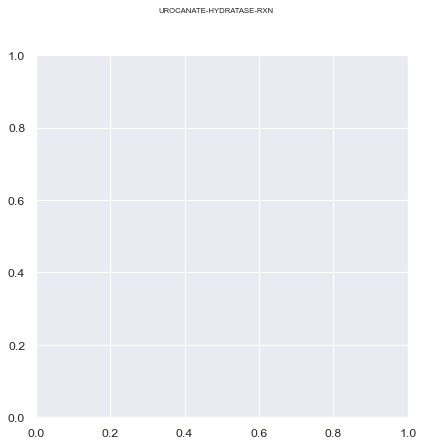

In [226]:
plt.figure(figsize=(6, 6), dpi=80)
if not os.path.exists('Sig_Plots_Rxns_Unstratified/'):
    os.mkdir('Sig_Plots_Rxns_Unstratified/')
for i in range(Rxn_Abund_Unstratified_Filtered.shape[0]):
    x=[1,1,1,3,3,5,5,5,7,7,7]
    x1=list(np.linspace(0.5,1.5,100))
    x2=list(np.linspace(2.5,3.5,100))
    x3=list(np.linspace(4.5,5.5,100))
    x4=list(np.linspace(6.5,7.5,100))
    x5=[1,3,3,5,7]
    y=list(Rxn_Abund_Unstratified_Filtered.iloc[i,[1,2,3,4,5,11,12,13,14,15,16]])
    y1=[statistics.median(y[0:3])]*len(x1)
    y2=[statistics.median(y[3:5])]*len(x1)
    y3=[statistics.median(y[5:8])]*len(x1)
    y4=[statistics.median(y[8:11])]*len(x1)
    y5=Rxn_Abund_Unstratified_Filtered.iloc[i,[6,7,8,9,10]]
    plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='k',linewidth=1,linestyle="--")
    plt.scatter(x,y,s=25,cmap='summer')
    plt.scatter(x5,y5,s=30,cmap='r',marker=',')
    plt.suptitle(Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],fontsize=7)
    plt.xticks([1,3,5,7],['Control','DSS','RCE','RCE+DSS'])
    top_DSS=plt.ylim()[1]-1
    if len(Sig_Results.loc[Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"]].shape)==1:     
        plt.text(6,top_DSS,Sig_Results.loc[Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"metadata"]+": " + str(Sig_Results.loc[Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"value"])+"\n\nCoeff: "+ str(Sig_Results.loc[Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"coef"])[0:5]+"\n\nP_value: "+str(format(Sig_Results.loc[Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"pval"],'f'))+"\n\nQ_value: "+str(format(Sig_Results.loc[Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"qval"],'f')),fontsize=9,verticalalignment="top")
    else:
        plt.text(6,top_DSS,Sig_Results.loc[Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"metadata"].iloc[0]+": " + str(Sig_Results.loc[Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"value"].iloc[0])+"\n\nCoeff: "+ str(Sig_Results.loc[Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"coef"].iloc[0])[0:5]+"\n\nP_value: "+str(format(Sig_Results.loc[Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"pval"].iloc[0],'f'))+"\n\nQ_value: "+str(format(Sig_Results.loc[Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"],"qval"].iloc[0],'f')),fontsize=9,verticalalignment="top")
    plt.xlabel("Treatment Group")
    plt.ylabel("Path Abundances")
    plt.savefig("Sig_Plots_Rxns_Unstratified/"+Rxn_Abund_Unstratified_Filtered.loc[i,"Sample_ID"][0:20].replace(': ','')+'.png',dpi=300)
    plt.cla()

In [12]:
Heatmap_Dict={"Rxn":[],"DSS_only":[],"RCE_only":[],"RCEwDSS_only":[]}
DF=pd.DataFrame(Heatmap_Dict)
Counter=0
for i in Rxn_Abund_Unstratified_Filtered["Sample_ID"]:
    DF.loc[Counter]=[i,0,0,0]
    Temp=Sig_Results.loc[i,['metadata','coef','qval']]
    if len(Temp.shape)==1:
        DF.loc[Counter,Temp['metadata']]=-np.log(Temp['qval'])*np.sign(Temp['coef'])
    else:
        for k in range(Temp.shape[0]):
            DF.loc[Counter,Temp['metadata'][k]]=-np.log(Temp['qval'][k])*np.sign(Temp['coef'][k])
    Counter+=1
DF.set_index("Rxn",inplace=True)

In [15]:
seaborn.set(rc = {'figure.figsize':(25,12)})


T=seaborn.color_palette("coolwarm", as_cmap=True)

for i in range(math.floor(DF.shape[0]/20)):
    if (i+1)*20<DF.shape[0]:
        ax=seaborn.heatmap(DF.iloc[20*i:20*(i+1)],cmap=T,linewidths=1, linecolor='white',square=True)

    else:
        ax=seaborn.heatmap(DF.iloc[20*i:],cmap=T,linewidths=1, linecolor='white',square=True)

    ax=ax.get_figure()    
    ax.savefig('Sig_Plots_Rxns_Unstratified/Rxn_Heatmap'+str(i))
    plt.clf()
    

<Figure size 1800x864 with 0 Axes>

In [44]:
Sig_Results.reset_index(inplace=True)

In [45]:
Sig_Results[Sig_Results['feature'].str.contains('|',regex=False)]

feature      metadata value  \
0     THYMIDYLATESYN-RXN|g__Muribaculaceae_unclassif...      DSS_only  TRUE   
1     THREONINE--TRNA-LIGASE-RXN|g__Lachnospiraceae_...      DSS_only  TRUE   
2     RXN-14267|g__Bacteroides.s__Bacteroides_vulgat...      DSS_only  TRUE   
3     RXN-16938|g__Bacteroides.s__Bacteroides_vulgat...      DSS_only  TRUE   
4     RXN0-5225|g__Bacteroides.s__Bacteroides_vulgat...      DSS_only  TRUE   
...                                                 ...           ...   ...   
8765  TRNA-PSEUDOURIDINE-SYNTHASE-I-RXN|g__Lactobaci...  RCEwDSS_only  TRUE   
8766  3.1.21.2-RXN|g__Faecalibaculum.s__Faecalibacul...  RCEwDSS_only  TRUE   
8768  3.4.21.102-RXN|g__Alistipes.s__Alistipes_timon...      RCE_only  TRUE   
8770  DNA-DIRECTED-RNA-POLYMERASE-RXN|g__Alistipes.s...  RCEwDSS_only  TRUE   
8771  HYDROG-RXN|g__Bacteroides.s__Bacteroides_vulgatus  RCEwDSS_only  TRUE   

          coef    stderr   N  N.not.0          pval      qval  
0    -0.811391  0.034310  12        6  6.142307e-08  0.000588  
1    -0.331696  0.014564  12        3  7.970885e-08  0.000700  
2     0.889789  0.043536  12        6  1.683612e-07  0.001183  
3     0.889789  0.043536  12        6  1.683612e-07  0.001183  
4     0.889789  0.043536  12        6  1.683612e-07  0.001183  
...        ...       ...  ..      ...           ...       ...  
8765 -0.539524  0.152184  12        3  9.403837e-03  0.099670  
8766  0.585274  0.165093  12        3  9.405075e-03  0.099673  
8768  1.013675  0.286051  12        9  9.423121e-03  0.099825  
8770  0.905315  0.255479  12        9  9.424312e-03  0.099825  
8771  0.603869  0.170413  12        6  9.424765e-03  0.099825  

[8215 rows x 9 columns]

In [47]:
Rxn_Abund_Filtered=Rxn_abund[Rxn_abund["Sample_ID"].isin(Sig_Results["feature"])]

In [48]:
Rxn_Abund_Stratified_Filtered=Rxn_Abund_Filtered[Rxn_Abund_Filtered['Sample_ID'].str.contains('|',regex=False)]
Rxn_Abund_Stratified_Filtered=Rxn_Abund_Stratified_Filtered.reset_index(drop=True)


In [52]:
Sig_Results.set_index("feature",inplace=True)

### DO NOT RUN THE FOLLOWING UNLESS YOU HAVE TIME AND SPACE FOR THOUSANDS OF PLOTS

In [ ]:
plt.figure(figsize=(6, 6), dpi=80)
if not os.path.exists('Sig_Plots_Rxns_Stratified/'):
    os.mkdir('Sig_Plots_Rxns_Stratified/')
for i in range(Rxn_Abund_Stratified_Filtered.shape[0]):
    x=[1,1,1,3,3,5,5,5,7,7,7]
    x1=list(np.linspace(0.5,1.5,100))
    x2=list(np.linspace(2.5,3.5,100))
    x3=list(np.linspace(4.5,5.5,100))
    x4=list(np.linspace(6.5,7.5,100))
    x5=[1,3,3,5,7]
    y=list(Rxn_Abund_Stratified_Filtered.iloc[i,[1,2,3,4,5,11,12,13,14,15,16]])
    y1=[statistics.median(y[0:3])]*len(x1)
    y2=[statistics.median(y[3:5])]*len(x1)
    y3=[statistics.median(y[5:8])]*len(x1)
    y4=[statistics.median(y[8:11])]*len(x1)
    y5=Rxn_Abund_Stratified_Filtered.iloc[i,[6,7,8,9,10]]
    plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='k',linewidth=1,linestyle="--")
    plt.scatter(x,y,s=25,cmap='summer')
    plt.scatter(x5,y5,s=30,cmap='r',marker=',')
    plt.suptitle(Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"],fontsize=7)
    plt.xticks([1,3,5,7],['Control','DSS','RCE','RCE+DSS'])
    top_DSS=plt.ylim()[1]-1
    if len(Sig_Results.loc[Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"]].shape)==1:     
        plt.text(6,top_DSS,Sig_Results.loc[Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"metadata"]+": " + str(Sig_Results.loc[Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"value"])+"\n\nCoeff: "+ str(Sig_Results.loc[Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"coef"])[0:5]+"\n\nP_value: "+str(format(Sig_Results.loc[Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"pval"],'f'))+"\n\nQ_value: "+str(format(Sig_Results.loc[Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"qval"],'f')),fontsize=9,verticalalignment="top")
    else:
        plt.text(6,top_DSS,Sig_Results.loc[Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"metadata"].iloc[0]+": " + str(Sig_Results.loc[Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"value"].iloc[0])+"\n\nCoeff: "+ str(Sig_Results.loc[Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"coef"].iloc[0])[0:5]+"\n\nP_value: "+str(format(Sig_Results.loc[Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"pval"].iloc[0],'f'))+"\n\nQ_value: "+str(format(Sig_Results.loc[Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"],"qval"].iloc[0],'f')),fontsize=9,verticalalignment="top")
    plt.xlabel("Treatment Group")
    plt.ylabel("Path Abundances")
    plt.savefig("Sig_Plots_Rxns_Stratified/"+Rxn_Abund_Stratified_Filtered.loc[i,"Sample_ID"][0:6]+'.png',dpi=300)
    plt.cla()

## Some Further Analysis

Tables Needed:

- Path_Abund_Stratified_Filtered
- Rxn_Abund_Unstratified_Filtered
- Path_Abund_Unstratified_Filtered

**Question 1:**

-	Several reactions that look apparently higher in DSS+RCJ but low in DSS and controlonly are alpha-L-focusidase: 
        - ALPHA-L-FOCUSIDEASE 
        - RXN-19378
        - RXN-19379
        - The figures all look the same, so they are probably from the same gene
        - Can you check if this gene/reaction is significantly higher in DSS+RCJ vs. DSS? It might not since one sample in DSS+RCJ is at the same level as DSS but two others are about 2-fold higher.


In [58]:
from scipy.stats import ttest_ind


In [59]:
Q1_List=["ALPHA","RXN-19378","RXN-19379"]
Q1_DF=Rxn_Abund_Unstratified_Filtered[Rxn_Abund_Unstratified_Filtered["Sample_ID"].str.contains("Something_Werid")]
for i in range(len(Q1_List)):
    Q1_DF=Q1_DF.append(Rxn_Abund_Unstratified_Filtered[Rxn_Abund_Unstratified_Filtered["Sample_ID"].str.contains(Q1_List[i])])
    
Q1_DF=Q1_DF.iloc[:,[4,5,-4,-3,-2]]

/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_62468/1343491695.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Q1_DF=Q1_DF.append(Rxn_Abund_Unstratified_Filtered[Rxn_Abund_Unstratified_Filtered["Sample_ID"].str.contains(Q1_List[i])])
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_62468/1343491695.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Q1_DF=Q1_DF.append(Rxn_Abund_Unstratified_Filtered[Rxn_Abund_Unstratified_Filtered["Sample_ID"].str.contains(Q1_List[i])])
/var/folders/jk/fr50qn391k794svhntbw333c0000gn/T/ipykernel_62468/1343491695.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Q1_DF=Q1_DF.append(Rxn_Abund_Unstratified_Filtered[Rxn_Abund_Unstratified_Filtered["Sample_ID"].str.con

In [60]:
Desired_Species=["d__Bacteria|p__Firmicutes|c__Clostridia|o__Eubacteriales|f__Lachnospiraceae|g__Roseburia|s__Roseburia intestinalis",
                 "d__Bacteria|p__Firmicutes|c__Clostridia|o__Eubacteriales|f__Lachnospiraceae|g__Roseburia|s__Roseburia hominis",
                "d__Bacteria|p__Firmicutes|c__Clostridia|o__Eubacteriales|f__Oscillospiraceae|g__Faecalibacterium|s__Faecalibacterium prausnitzii",
                "d__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Akkermansiaceae|g__Akkermansia|s__Akkermansia muciniphila",
                "k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_johnsonii",
                "k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_pseudolongum",
                "k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Oscillospiraceae|g__Oscillibacter|s__Oscillibacter_sp_1_3",
                "k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Dorea|s__Dorea_sp_5_2",
                "k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Lachnospiraceae_unclassified|s__Lachnospiraceae_bacterium_10_1",
                 "k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Acetatifactor|s__Acetatifactor_muris"
                ]

In [61]:
Metaphlan=pd.read_table("Merge_Metaphlan_Clean.tsv")
Kraken_TSS=pd.read_table("Species_TSS.csv",delimiter=",")
Kraken_CSS=pd.read_table("Species_Normalized.txt",delimiter="\t")

In [72]:
Metaphlan=Metaphlan.reindex(sorted(Metaphlan.columns), axis=1).set_index("clade_name").reset_index()
Metaphlan.drop("NCBI_tax_id",axis=1,inplace=True)

In [73]:
Met_Cols=["clade_name"]
[Met_Cols.append(colname.strip("_metaphlan_bugs_list")) for colname in Metaphlan.columns if "_metaphlan_bugs_list" in colname]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [74]:
Dict={}
for i in range(len(Metaphlan.columns)):
    Dict[Metaphlan.columns[i]]=Met_Cols[i]

Dict["Start_metaphlan_bugs_list"]="Start"
Dict["clade_name"]="Taxon"
Dict["DSS_treatedp_metaphlan_bugs_list"]="DSS_treatedp"
Dict["DSS_treatedp_metaphlan_bugs_list"]="DSS_treatedp"
Dict['D_Control_metaphlan_bugs_list']="D_Control"

Metaphlan.rename(Dict,inplace=True,axis=1)
Kraken_TSS.rename({"Taxonomy":"Taxon"},inplace=True,axis=1)

In [75]:
Final_Table=pd.DataFrame(columns = Metaphlan.columns)

In [76]:
for Bac in Desired_Species:
    if Bac in list(Metaphlan["Taxon"]):
        Final_Table=Final_Table.append(Metaphlan[Metaphlan["Taxon"]==Bac])
    else:
        Final_Table=Final_Table.append(Kraken_TSS[Kraken_TSS["Taxon"]==Bac])
        

In [77]:
Bac_Names=list([name[-1].strip("s__") for name in Final_Table["Taxon"].str.split("|")])

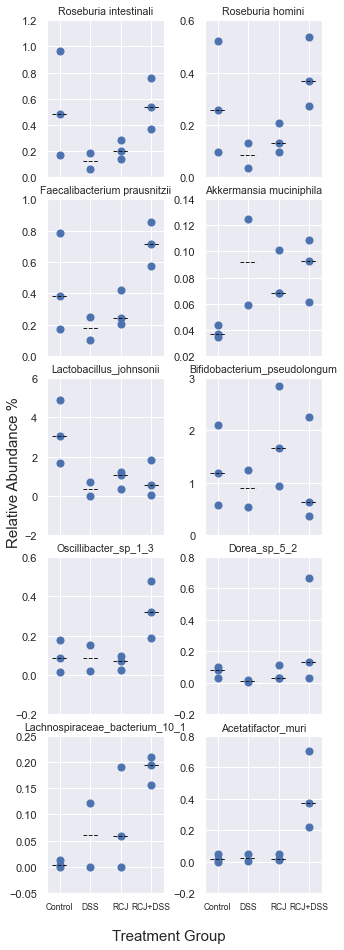

In [93]:
fig,axs=plt.subplots(int(Final_Table.shape[0]/2),2,figsize=(4.5, 13),sharex=True,constrained_layout=False)
for i in range(Final_Table.shape[0]):
    x=[1,1,1,3,3,5,5,5,7,7,7]
    x1=list(np.linspace(0.5,1.5,100))
    x2=list(np.linspace(2.5,3.5,100))
    x3=list(np.linspace(4.5,5.5,100))
    x4=list(np.linspace(6.5,7.5,100))
    x5=[1,3,3,5,7]
    y=list(Final_Table.iloc[i,[1,2,3,4,5,11,12,13,14,15,16]])
    y1=[statistics.median(y[0:3])]*len(x1)
    y2=[statistics.median(y[3:5])]*len(x1)
    y3=[statistics.median(y[5:8])]*len(x1)
    y4=[statistics.median(y[8:11])]*len(x1)
    y5=Final_Table.iloc[i,[6,7,8,9,10]]
    axs[math.floor(i/2),i%2].plot(x1,y1,x2,y2,x3,y3,x4,y4,color='k',linewidth=1,linestyle="--")
    axs[math.floor(i/2),i%2].scatter(x,y,s=50,cmap='summer')
#     axs[math.floor(i/2),i%2].scatter(x5,y5,s=70,cmap='r',marker=',')

    axs[math.floor(i/2),i%2].set_xticks([1,3,5,7],['Control','DSS','RCJ','RCJ+DSS'],fontsize=8.5)
    axs[math.floor(i/2),i%2].set_yticks(axs[math.floor(i/2),i%2].get_yticks(),fontsize=50)    
    axs[math.floor(i/2),i%2].set_title(Bac_Names[i],fontsize=10.5)
fig.text(0.5, 0, 'Treatment Group', ha='center',fontsize=15)
fig.text(0, 0.5, 'Relative Abundance %', va='center', rotation='vertical',fontsize=15)
fig.tight_layout(pad=0.2)
fig.subplots_adjust(bottom=0.05)
fig.savefig("Taxa_of_Interest.png",dpi=600,bbox_inches="tight")

In [94]:
Desired_Items=["AMINOGLYCOSIDE-N3-ACETYLTRANSFERASE-RXN",
               "PWY-5910: superpathway of geranylgeranyldiphosphate biosynthesis I (via mevalonate)",
               "TAURINE-AMINOTRANSFERASE-RXN",
               "RXN-20702",
               "GLUDEG-I-PWY: GABA shunt|g__Lactobacillus.s__Lactobacillus_reuteri",
               "LACTOSECAT-PWY: lactose and galactose degradation I|g__Lactobacillus.s__Lactobacillus_johnsonii"]
Item_Name=["AMINOGLYCOSIDE-N3-ACETYLTRANSFERASE".lower(),
           "superpathway of geranylgeranyldiphosphate biosynthesis",
           "TAURINE-AMINOTRANSFERASE".lower(),
           "isethionate sulfite-lyase",
          "GABA shunt: Lactobacillus_reuteri",
          "lactose and galactose degradation I: Lactobacillus_johnsonii"
          ]               

In [95]:
Path_abund=pd.read_csv("Merged_Pathabundance_Table_CPM_meta.tsv",delimiter='\t')
Rxn_abund=pd.read_csv("./rxn-cpm.txt",delimiter='\t')

In [96]:
Final_Table=pd.DataFrame(columns = Path_abund.columns)

In [97]:
for item in Desired_Items:
    if item in list(Path_abund["Sample_ID"]):
        Final_Table=Final_Table.append(Path_abund[Path_abund["Sample_ID"]==item])
    else:
        Final_Table=Final_Table.append(Rxn_abund[Rxn_abund["Sample_ID"]==item])
        

In [98]:
Final_Table.reset_index(inplace=True,drop=True)

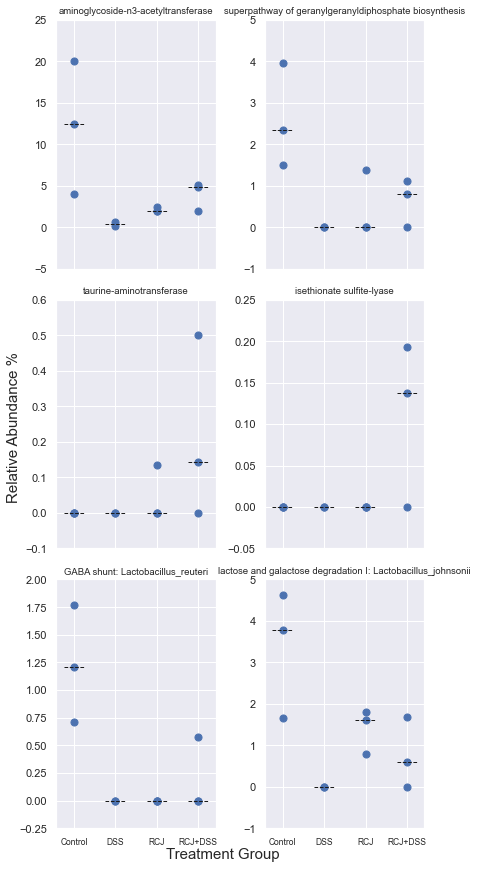

In [105]:
fig,axs=plt.subplots(int(Final_Table.shape[0]/2),2,figsize=(6, 12),sharex=True,constrained_layout=False)
for i in range(Final_Table.shape[0]):
    x=[1,1,1,3,3,5,5,5,7,7,7]
    x1=list(np.linspace(0.5,1.5,100))
    x2=list(np.linspace(2.5,3.5,100))
    x3=list(np.linspace(4.5,5.5,100))
    x4=list(np.linspace(6.5,7.5,100))
    x5=[1,3,3,5,7]
    y=list(Final_Table.iloc[i,[1,2,3,4,5,11,12,13,14,15,16]])
    y1=[statistics.median(y[0:3])]*len(x1)
    y2=[statistics.median(y[3:5])]*len(x1)
    y3=[statistics.median(y[5:8])]*len(x1)
    y4=[statistics.median(y[8:11])]*len(x1)
    y5=Final_Table.iloc[i,[6,7,8,9,10]]
    axs[math.floor(i/2),i%2].plot(x1,y1,x2,y2,x3,y3,x4,y4,color='k',linewidth=1,linestyle="--")
    axs[math.floor(i/2),i%2].scatter(x,y,s=50,cmap='summer')
#     axs[math.floor(i/2),i%2].scatter(x5,y5,s=70,cmap='r',marker=',')

    axs[math.floor(i/2),i%2].set_xticks([1,3,5,7],['Control','DSS','RCJ','RCJ+DSS'],fontsize=8.5)
    axs[math.floor(i/2),i%2].set_yticks(axs[math.floor(i/2),i%2].get_yticks(),fontsize=50)    
    axs[math.floor(i/2),i%2].set_title(Item_Name[i],fontsize=9.5)
fig.text(0.5, 0, 'Treatment Group', ha='center',fontsize=15)
fig.text(0, 0.5, 'Relative Abundance %', va='center', rotation='vertical',fontsize=15)
fig.tight_layout(pad=1)
fig.savefig("Rxns_of_Interest2.png",dpi=600,bbox_inches="tight")